# Notebook for Analyze Sentiment : Stardew Valley APK Play Store

- **Nama:** Abid Juliant Indraswara
- **Email:** abidjuliant@gmail.com
- **ID Dicoding:** abidindraswara

Scraping dataset untuk projek sentimen analisis NLP dengan studi kasus review atau ulasan pada aplikasi game mobile Stardew Valley yang di scrape melalui ulasan Play Store.

Stardew Valley merupakan game simulasi kehidupan yang sangat populer hampir mirip seperti Harvest Moon. Dikembangkan oleh ConcernedApe (nama samaran dari Eric "ConcernedApe" Barone, pengembang tunggalnya), dan pertama kali dirilis pada tahun 2016. Game ini dirilis di berbagai platform, termasuk PC (Steam), PlayStation, Xbox, Nintendo Switch, dan perangkat mobile (Android dan iOS).

Latar Belakang :

Game ini sangat populer karena game yang sangat santai yang bertemakan cocok tanam di desa. Pemain akan diajak untuk benar-benar hidup dan bersosialisasi juga menyelesaikan quest. Game juga memiliki tantangan di setiap stagenya. Berjalannya waktu game perlu dikembangkan dengan memperhatikan kepuasaan para pemainnya. Melihat kekurangan ketika memainkannya dan tentunya review dari para pemain dapat menjadi kunci dalam pengembangannya. Baik itu review positif, negatif maupun netral menentukan cara para pengembang game ke depannya serta tentunya agar para pemain dapat terus bermain bersama Stardew Valley.

## Import Semua Packages / Library yang Digunakan

In [52]:
# Import Library / Packages
# Olah Data dan Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

# Preprocessing Data
import datetime as dt
import re  # kebutuhan reguler expression (RegEx)
import string  # berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # untuk melakukan tokenisasi pada teks
from nltk.corpus import stopwords  # daftar stopwords dalam teks
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Model ML
import xgboost as xgb
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest

pd.options.mode.chained_assignment = None  # menonaktifkan peringatan chaining
seed = 0
np.random.seed(seed)  # mengatur seed untuk reproduktibilitas
nltk.download('punkt')  # mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # mengunduh dataset yang berisi daftar stopwords dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Load Dataset

In [2]:
# Koneksi ke Google Drive untuk import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cek Folder
!ls '/content/drive/My Drive/Dataset_MachineLearning/Dataset_StardewValley_Review_PlayStore/'

stardew_us_review.csv  stardew_us_review_header.csv


In [4]:
# Dataset Review Aplikasi Stardew Valley PLay Store
stardew_df = pd.read_csv("/content/drive/My Drive/Dataset_MachineLearning/Dataset_StardewValley_Review_PlayStore/stardew_us_review.csv")
stardew_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9f732bb9-d9af-4144-9f7a-7f5f389163a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love this game, I've sunken 30 hours into it...",4,22,1.6.11.0,2024-11-06 23:45:03,NaN,NaN,1.6.11.0
1,b0899b5c-3b5c-457a-a7b0-db104e83596b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love this game and everything about it, but ...",3,4,1.6.13.0,2024-11-10 23:48:51,NaN,NaN,1.6.13.0
2,905e8303-2b21-456c-ac89-d31ccb724b9f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love this game and its new features in the upd...,3,3,1.6.13.0,2024-11-09 03:29:27,NaN,NaN,1.6.13.0
3,3bf88a99-c707-4f9e-bea0-df9de2147e6b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The crashing issue has been resolved for me. I...,5,2,1.6.13.2,2024-11-10 19:26:08,NaN,NaN,1.6.13.2
4,230605b3-173f-4ec3-8b29-d1d5fdd4fd65,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's a bit overwhelming in the beginning and q...,5,20,1.6.12.0,2024-11-08 05:52:29,NaN,NaN,1.6.12.0
...,...,...,...,...,...,...,...,...,...,...,...
22539,081970ae-bef7-4f1d-9cc8-ae383bf1d303,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,💖💖💖,5,1,NaN,2019-12-14 20:07:29,NaN,NaN,NaN
22540,fd6ffb59-d638-4984-bc96-04923be70ad3,Chadia Mae Arzaga,https://play-lh.googleusercontent.com/a-/ALV-U...,✨✨✨✨✨,5,0,NaN,2021-02-22 07:00:25,NaN,NaN,NaN
22541,8bfda1c4-4583-4578-ba38-f6ba147d2887,Melissa McQuigg,https://play-lh.googleusercontent.com/a/ACg8oc...,: ),5,1,NaN,2022-08-19 02:00:35,NaN,NaN,NaN
22542,95ffd8fc-2b0a-4ba7-9d1d-73baec4b72fa,J S,https://play-lh.googleusercontent.com/a/ACg8oc...,❤️❤️❤️,5,0,NaN,2023-01-07 23:01:09,NaN,NaN,NaN


In [5]:
# Cek banyak bari dan kolom
stardew_df.shape

(22544, 11)

In [6]:
# Info untk masing-masing kolom secara tipe data dan jumlah data
stardew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              22544 non-null  object
 1   userName              22544 non-null  object
 2   userImage             22544 non-null  object
 3   content               22544 non-null  object
 4   score                 22544 non-null  int64 
 5   thumbsUpCount         22544 non-null  int64 
 6   reviewCreatedVersion  19712 non-null  object
 7   at                    22544 non-null  object
 8   replyContent          74 non-null     object
 9   repliedAt             74 non-null     object
 10  appVersion            19712 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.9+ MB


Pada bagian info() terlihat jika terdapat 2 kolom yang berjumlah 74 baris. Dua kolom ini tidak akan digunakan dalam pengolahan model. Sehingga tidak akan dilakukan dropna karena ditakutkan terjadi pengurangan data yang cukup banyak.

In [7]:
# Menghapus baris data yang memiliki nilai NaN akan mengakibatkan data yang cukup banyak maka menggunakan subset
clean_stardew_df = stardew_df.dropna(subset=['reviewCreatedVersion'])

In [8]:
# Menghapus baris data yang terdapat duplikat
clean_stardew_df = clean_stardew_df.drop_duplicates()

In [9]:
# Cek banyak data setelah dropna() dan drop_duplicate()
clean_stardew_df.shape

(19712, 11)

## Preprocessing Dataset Teks

In [10]:
def cleaningText(text):
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghilangkan bentuk kata/kalimat hashtag
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghilangkan bentuk kata/kalimat mention
    text = re.sub(r"http\S+", '', text) # menghilangkan link
    text = re.sub(r'RT[\s]', '', text) # menghilangkan RT
    text = re.sub(r'[^\w\s]', '', text) # menghilangkan simbol angka
    text = re.sub(r'[0-9]+', '', text) # menghilangkan angka
    text = text.replace('\n', ' ') # mengganti enter menjadi spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghilangkan semua tanda baca
    text = text.strip(' ') # menghialngkan karakter spasi dari sisi kanan dan kiri baik teks atau kalimat
    return text

def casefoldingText(text):
    text = text.lower() # mengubah karakter menjadi huruf kecil
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    listStopwords.update([
        'hiya', 'yeah', 'no', 'not', 'like', 'it', 'that', 'this', 'too', 'very', 'just',
        'because', 'are', 'is', 'was', 'were', 'be', 'been', 'being', 'am', 'I', 'you',
        'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your',
        'his', 'her', 'its', 'our', 'their', 'ours', 'yours', 'theirs', 'whose', 'who',
        'whom', 'which', 'this', 'that', 'these', 'those', 'and', 'but', 'if', 'or', 'as',
        'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
        'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
        'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
        'few', 'more', 'most', 'other', 'some', 'such', 'noone', 'nor', 'not', 'only', 'own',
        'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',
        'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn',
        'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn',
        'wasn', 'weren', 'won', 'wouldn'
    ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    stemmer = PorterStemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [11]:
# Daftar SlangWord English
slangwords = {
    "@": "at",
    "btw": "by the way",
    "omg": "oh my god",
    "lol": "laughing out loud",
    "lmao": "laughing my ass off",
    "brb": "be right back",
    "smh": "shaking my head",
    "idk": "I don't know",
    "fr": "for real",
    "tbh": "to be honest",
    "fomo": "fear of missing out",
    "noob": "newbie",
    "lit": "cool or exciting",
    "savage": "ruthless or bold",
    "slay": "excel or succeed",
    "tbh": "to be honest",
    "sus": "suspect or suspicious",
    "srsly": "seriously",
    "bff": "best friends forever",
    "mfw": "my face when",
    "af": "as f***",
    "bae": "before anyone else",
    "fam": "family or close friends",
    "flex": "show off",
    "goat": "greatest of all time",
    "tbh": "to be honest",
    "yolo": "you only live once",
    "wyd": "what you doing",
    "wya": "where you at",
    "wth": "what the heck",
    "smh": "shaking my head",
    "vibe": "mood or feeling",
    "lmk": "let me know",
    "pov": "point of view",
    "np": "no problem",
    "yass": "yes",
    "chill": "relax",
    "cringe": "awkward or embarrassing",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "omfg": "oh my f***ing god",
    "tbf": "to be fair",
    "jk": "just kidding",
    "imho": "in my humble opinion",
    "ik": "I know",
    "gtg": "got to go",
    "l8r": "later",
    "noice": "nice",
    "w/e": "whatever",
    "yup": "yes",
    "yup": "yes",
    "nvm": "never mind",
    "bruh": "bro or brother",
    "wussup": "what's up",
    "lolz": "laugh out loud",
    "tmi": "too much information",
    "fyi": "for your information",
    "lil": "little",
    "gonna": "going to",
    "wanna": "want to",
    "gud": "good",
    "ruin": "destroy",
    "srs": "serious",
    "ppl": "people",
    "rly": "really",
    "gud": "good",
    "hmu": "hit me up",
    "w8": "wait",
    "dunno": "don't know",
    "xoxo": "hugs and kisses",
    "thx": "thanks",
    "rn": "right now",
    "gr8": "great",
    "b4": "before",
    "imo": "in my opinion",
    "sus": "suspect",
    "ttyl": "talk to you later",
    "slay": "dominate or succeed",
    "ftw": "for the win",
    "tldr": "too long, didn't read",
    "omw": "on my way",
    "diy": "do it yourself",
    "bbl": "be back later",
    "fml": "f*** my life",
    "smh": "shaking my head",
    "lmao": "laughing my ass off",
    "lmfao": "laughing my f***ing ass off",
    "asap": "as soon as possible",
    "nsfw": "not safe for work",
    "nvm": "never mind",
    "gtfo": "get the fuck out",
    "ikr": "I know, right?",
    "wyd": "what you doing",
    "nm": "not much",
    "np": "no problem",
    "brb": "be right back",
    "ttyl": "talk to you later",
    "yasss": "yes",
    "srsly": "seriously",
    "l8r": "later",
    "fomo": "fear of missing out",
    "shook": "shocked",
    "sis": "sister",
    "bro": "brother",
    "vibe": "mood, feeling",
    "lit": "amazing, awesome",
    "clout": "influence or power",
    "ship": "relationship (often used for pairing people)",
    "bae": "before anyone else",
    "slay": "do really well, succeed",
    "lowkey": "secretly, quietly",
    "highkey": "openly, not secret",
    "stan": "support passionately",
    "zaddy": "handsome man, usually older",
    "sus": "suspicious",
    "blessed": "lucky or grateful",
    "hmu": "hit me up",
    "fam": "family or close friends",
    "chill": "relax or calm down",
    "grind": "work hard at something",
    "mood": "feeling or attitude",
    "shady": "suspicious or sneaky",
    "no cap": "no lie",
    "on fleek": "on point, looking great",
    "finesse": "to manage something with skill",
}

In [12]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [13]:
clean_stardew_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9f732bb9-d9af-4144-9f7a-7f5f389163a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love this game, I've sunken 30 hours into it...",4,22,1.6.11.0,2024-11-06 23:45:03,NaN,NaN,1.6.11.0
1,b0899b5c-3b5c-457a-a7b0-db104e83596b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love this game and everything about it, but ...",3,4,1.6.13.0,2024-11-10 23:48:51,NaN,NaN,1.6.13.0
2,905e8303-2b21-456c-ac89-d31ccb724b9f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love this game and its new features in the upd...,3,3,1.6.13.0,2024-11-09 03:29:27,NaN,NaN,1.6.13.0
3,3bf88a99-c707-4f9e-bea0-df9de2147e6b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The crashing issue has been resolved for me. I...,5,2,1.6.13.2,2024-11-10 19:26:08,NaN,NaN,1.6.13.2
4,230605b3-173f-4ec3-8b29-d1d5fdd4fd65,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's a bit overwhelming in the beginning and q...,5,20,1.6.12.0,2024-11-08 05:52:29,NaN,NaN,1.6.12.0
...,...,...,...,...,...,...,...,...,...,...,...
22097,ce7ba88a-ccb0-479c-b6e9-388ce296a2f8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,💕,5,0,1.00,2019-03-13 23:27:25,NaN,NaN,1.00
22098,e37e16cd-a049-4f27-a949-7ed1d483763a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Rad,5,1,1.00,2019-03-14 01:39:49,NaN,NaN,1.00
22099,da07e573-79d8-40bc-8458-0e7faffca058,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,yeet,5,0,1.00,2019-03-15 16:42:23,NaN,NaN,1.00
22100,ff3aaf6e-e6be-4da9-b5dd-617f204e06e4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,epic,5,0,1.00,2019-03-14 14:58:37,NaN,NaN,1.00


In [18]:
# Menjalankan seluruh fungsi preprocessing data teks agar lebih bersih dan mudah diolah
# Text Clean
clean_stardew_df['text_clean'] = clean_stardew_df['content'].apply(cleaningText)
# Text Case Folding
clean_stardew_df['text_casefoldingText'] = clean_stardew_df['text_clean'].apply(casefoldingText)
# Text Slang Words
clean_stardew_df['text_slangwords'] = clean_stardew_df['text_casefoldingText'].apply(fix_slangwords)
# Tokenization Text
clean_stardew_df['text_tokenizingText'] = clean_stardew_df['text_slangwords'].apply(tokenizingText)
# Stopwords Text
clean_stardew_df['text_stopword'] = clean_stardew_df['text_tokenizingText'].apply(filteringText)
# To Sentence
clean_stardew_df['text_akhir'] = clean_stardew_df['text_stopword'].apply(toSentence)

In [20]:
# Cek Hasil Preprocessing Data Teks
clean_stardew_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,9f732bb9-d9af-4144-9f7a-7f5f389163a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love this game, I've sunken 30 hours into it...",4,22,1.6.11.0,2024-11-06 23:45:03,NaN,NaN,1.6.11.0,I love this game Ive sunken hours into it and...,i love this game ive sunken hours into it and...,i love this game ive sunken hours into it and ...,"[i, love, this, game, ive, sunken, hours, into...","[love, game, ive, sunken, hours, still, much, ...",love game ive sunken hours still much docked s...
1,b0899b5c-3b5c-457a-a7b0-db104e83596b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love this game and everything about it, but ...",3,4,1.6.13.0,2024-11-10 23:48:51,NaN,NaN,1.6.13.0,I love this game and everything about it but s...,i love this game and everything about it but s...,i love this game and everything about it but s...,"[i, love, this, game, and, everything, about, ...","[love, game, everything, since, recent, three,...",love game everything since recent three update...
2,905e8303-2b21-456c-ac89-d31ccb724b9f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love this game and its new features in the upd...,3,3,1.6.13.0,2024-11-09 03:29:27,NaN,NaN,1.6.13.0,Love this game and its new features in the upd...,love this game and its new features in the upd...,love this game and its new features in the upd...,"[love, this, game, and, its, new, features, in...","[love, game, new, features, update, however, u...",love game new features update however updating...
3,3bf88a99-c707-4f9e-bea0-df9de2147e6b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The crashing issue has been resolved for me. I...,5,2,1.6.13.2,2024-11-10 19:26:08,NaN,NaN,1.6.13.2,The crashing issue has been resolved for me I ...,the crashing issue has been resolved for me i ...,the crashing issue has been resolved for me i ...,"[the, crashing, issue, has, been, resolved, fo...","[crashing, issue, resolved, appreciate, effort...",crashing issue resolved appreciate efforts dev...
4,230605b3-173f-4ec3-8b29-d1d5fdd4fd65,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's a bit overwhelming in the beginning and q...,5,20,1.6.12.0,2024-11-08 05:52:29,NaN,NaN,1.6.12.0,Its a bit overwhelming in the beginning and qu...,its a bit overwhelming in the beginning and qu...,its a bit overwhelming in the beginning and qu...,"[its, a, bit, overwhelming, in, the, beginning...","[bit, overwhelming, beginning, quickly, unfold...",bit overwhelming beginning quickly unfolds int...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22097,ce7ba88a-ccb0-479c-b6e9-388ce296a2f8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,💕,5,0,1.00,2019-03-13 23:27:25,NaN,NaN,1.00,,,,[],[],
22098,e37e16cd-a049-4f27-a949-7ed1d483763a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Rad,5,1,1.00,2019-03-14 01:39:49,NaN,NaN,1.00,Rad,rad,rad,[rad],[rad],rad
22099,da07e573-79d8-40bc-8458-0e7faffca058,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,yeet,5,0,1.00,2019-03-15 16:42:23,NaN,NaN,1.00,yeet,yeet,yeet,[yeet],[yeet],yeet
22100,ff3aaf6e-e6be-4da9-b5dd-617f204e06e4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,epic,5,0,1.00,2019-03-14 14:58:37,NaN,NaN,1.00,epic,epic,epic,[epic],[epic],epic


## Proses Pelabelan Kategori Jenis Teks

In [21]:
import csv
import requests
from io import StringIO

# Lexicon Positif
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Lexicon Negatif
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

# Lexicon Netral
# Menambahkan kamus kata-kata netral (kata-kata yang tidak menambah sentimen)
lexicon_neutral = {
    "and": 0, "the": 0, "to": 0, "a": 0, "of": 0, "in": 0, "for": 0,
    "on": 0, "at": 0, "with": 0, "by": 0, "as": 0, "that": 0, "it": 0,
    "is": 0, "was": 0, "were": 0, "be": 0, "am": 0, "are": 0, "not": 0,
    "this": 0, "have": 0, "or": 0, "but": 0, "from": 0, "so": 0, "you": 0,
    "i": 0, "we": 0, "he": 0, "she": 0, "they": 0, "can": 0, "will": 0,
    "just": 0, "like": 0, "how": 0, "all": 0, "what": 0, "where": 0, "when": 0,
    "there": 0, "these": 0, "those": 0, "which": 0, "now": 0, "some": 0
}

In [22]:
# Fungsi untuk menganalisis sentimen teks dan mengklasifikasikan polaritas
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    # Jika 'text' sudah berupa daftar kata, langsung gunakan list tersebut
    # Tidak perlu melakukan split() karena sudah dalam bentuk list
    if isinstance(text, list):
        words = text
    else:
        words = text.split()  # Jika berupa string, split ke dalam kata-kata

    for word in words:
        word = word.lower()
        # Cek kata positif
        if word in lexicon_positive:
            score += lexicon_positive[word]
        # Cek kata negatif
        elif word in lexicon_negative:
            score += lexicon_negative[word]
        # Cek kata netral (kata umum atau fungsional)
        elif word in lexicon_neutral:
            score += lexicon_neutral[word]  # Untuk kata netral tetap menambahkan 0, namun menjaga agar proses tetap ada

    # Tentukan polaritas berdasarkan skor
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'  # Jika skor 0, beri label netral

    return score, polarity

In [23]:
# Cek Teks dengan Kategori Positif, Negatif dan Netral
results = clean_stardew_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_stardew_df['polarity_score'] = results[0]
clean_stardew_df['polarity'] = results[1]
print(clean_stardew_df['polarity'].value_counts())

polarity
positive    14151
neutral      3858
negative     1703
Name: count, dtype: int64


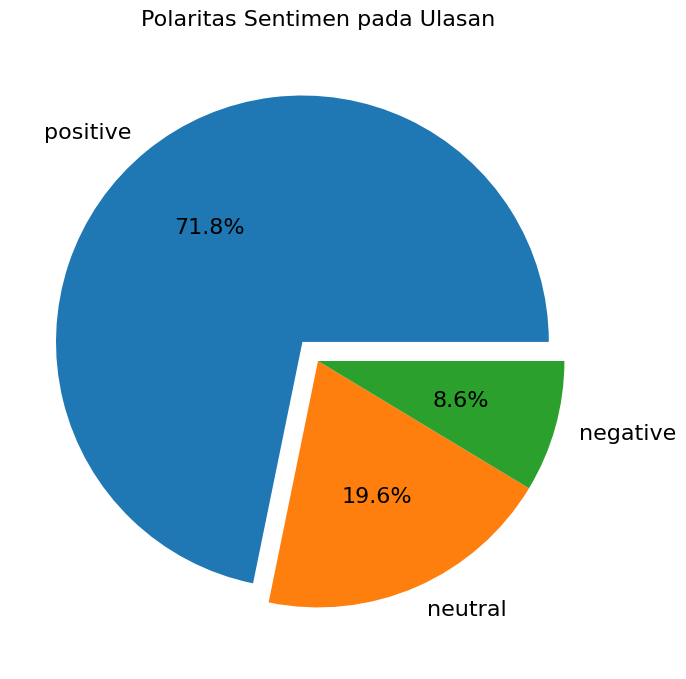

In [24]:
# Membuat Grafik Perbandingan Positif, Negatif dan Netral
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
sizes = [count for count in clean_stardew_df['polarity'].value_counts()]
labels = list(clean_stardew_df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 16})
ax.set_title('Polaritas Sentimen pada Ulasan', fontsize=16, pad=20)
plt.show()

In [25]:
# Mempersiapkan Wordcloud Positif
pd.set_option('display.max_colwidth', 3000)
positive_contents = clean_stardew_df[clean_stardew_df['polarity'] == 'positive']
positive_contents = positive_contents[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_contents = positive_contents.sort_values(by='polarity_score', ascending=False)
positive_contents = positive_contents.reset_index(drop=True)
positive_contents.index += 1

In [26]:
# Mempersiapkan Wordcloud Negatif
pd.set_option('display.max_colwidth', 3000)
negative_contents = clean_stardew_df[clean_stardew_df['polarity'] == 'negative']
negative_contents = negative_contents[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_contents = negative_contents.sort_values(by='polarity_score', ascending=True)
negative_contents = negative_contents[0:10]
negative_contents = negative_contents.reset_index(drop=True)
negative_contents.index += 1

In [27]:
# Mempersiapkan Wordcloud Netral
pd.set_option('display.max_colwidth', 3000)
neutral_contents = clean_stardew_df[clean_stardew_df['polarity'] == 'neutral']
neutral_contents = neutral_contents[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_contents = neutral_contents.sort_values(by='polarity_score', ascending=True)
neutral_contents = neutral_contents[0:10]
neutral_contents = neutral_contents.reset_index(drop=True)
neutral_contents.index += 1

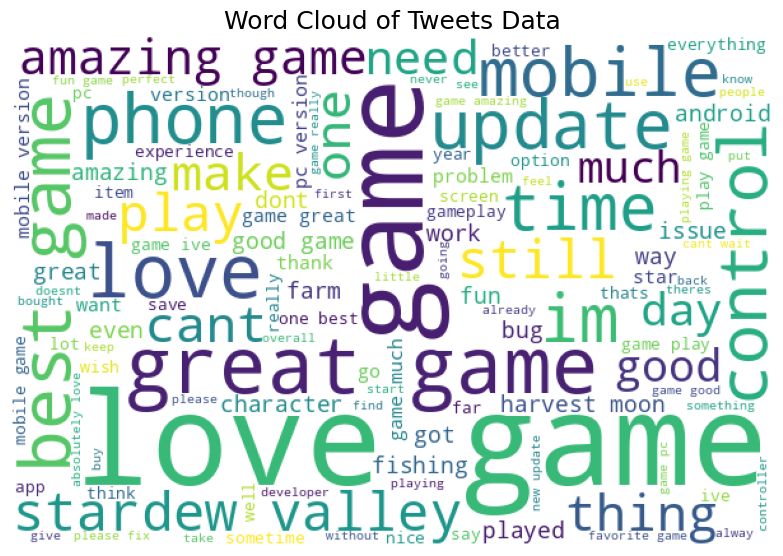

In [28]:
# Menampilkan Wordcloud untuk Semua Jenis Teks Konten
list_words = ''

for tweet in clean_stardew_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

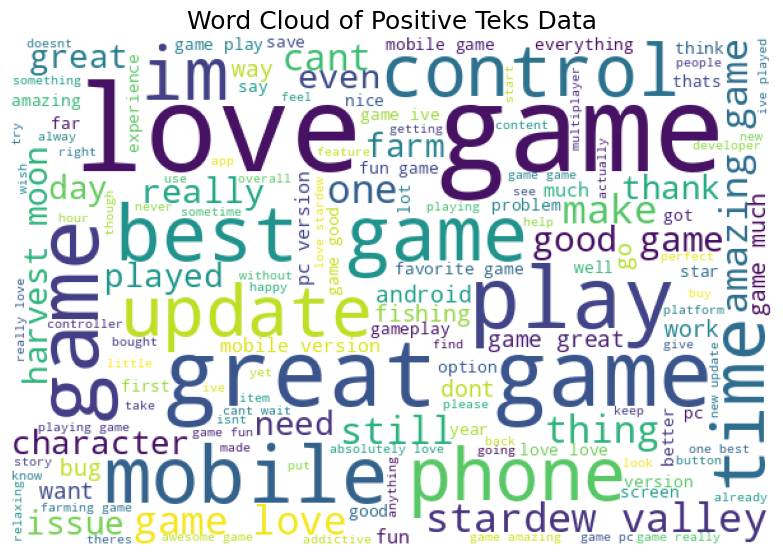

In [29]:
# Menampilkan Wordcloud untuk Jenis Teks Konten Positif
list_words = ''

for content in positive_contents['text_stopword']:
    for word in content:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Positive Teks Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

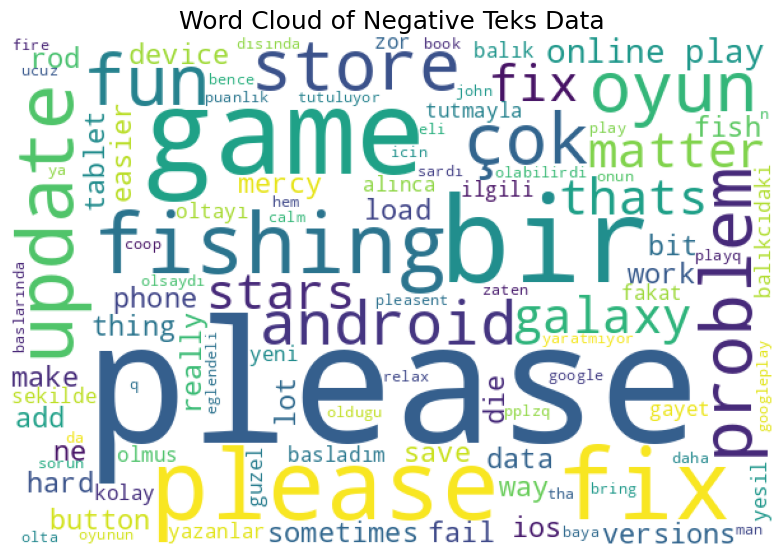

In [30]:
# Menampilkan Wordcloud untuk Jenis Teks Konten Negatif
list_words = ''

for content in negative_contents['text_stopword']:
    for word in content:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Negative Teks Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

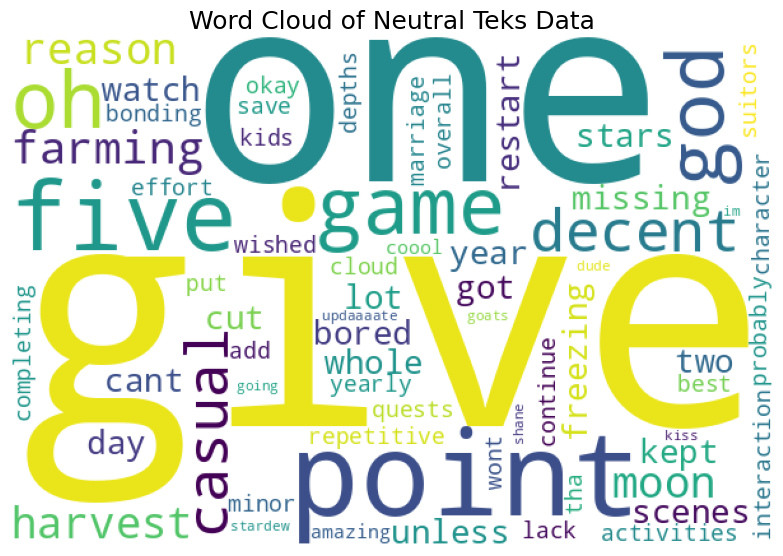

In [31]:
# Menampilkan Wordcloud untuk Jenis Teks Konten Netral
list_words = ''

for content in neutral_contents['text_stopword']:
    for word in content:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Neutral Teks Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

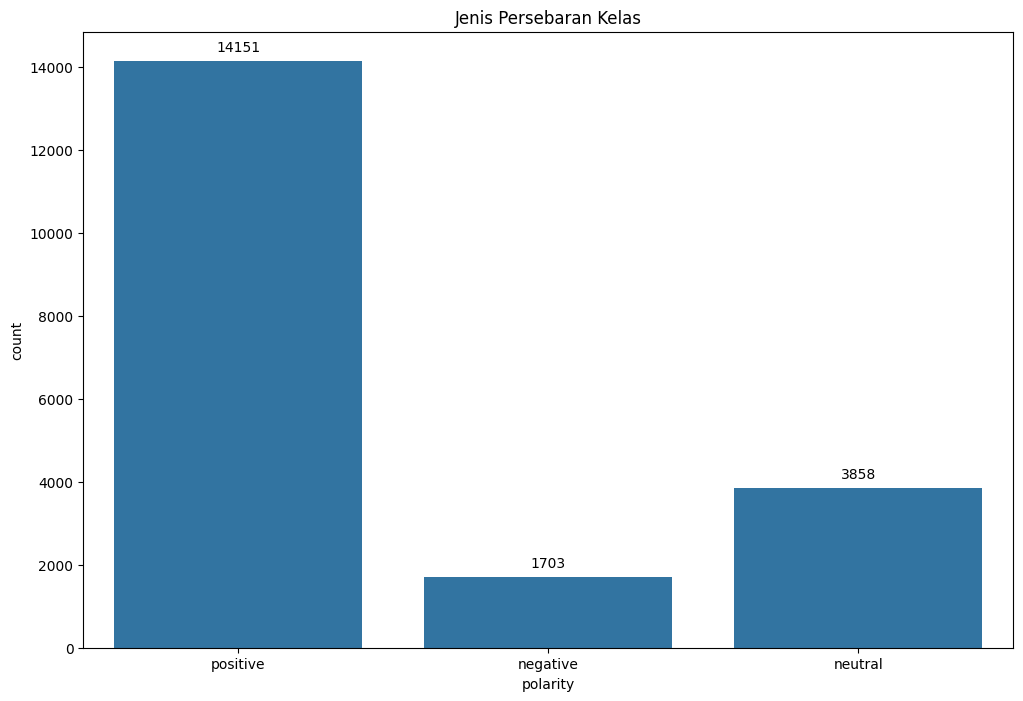

In [32]:
# Membuat Grafik untuk Melihat Analisis Data Teks
# Bar Chart Distribusi Kategori
plt.figure(figsize=(12, 8))
class_dist_plot = sns.countplot(x='polarity', data=clean_stardew_df)
plt.title('Jenis Persebaran Kelas')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

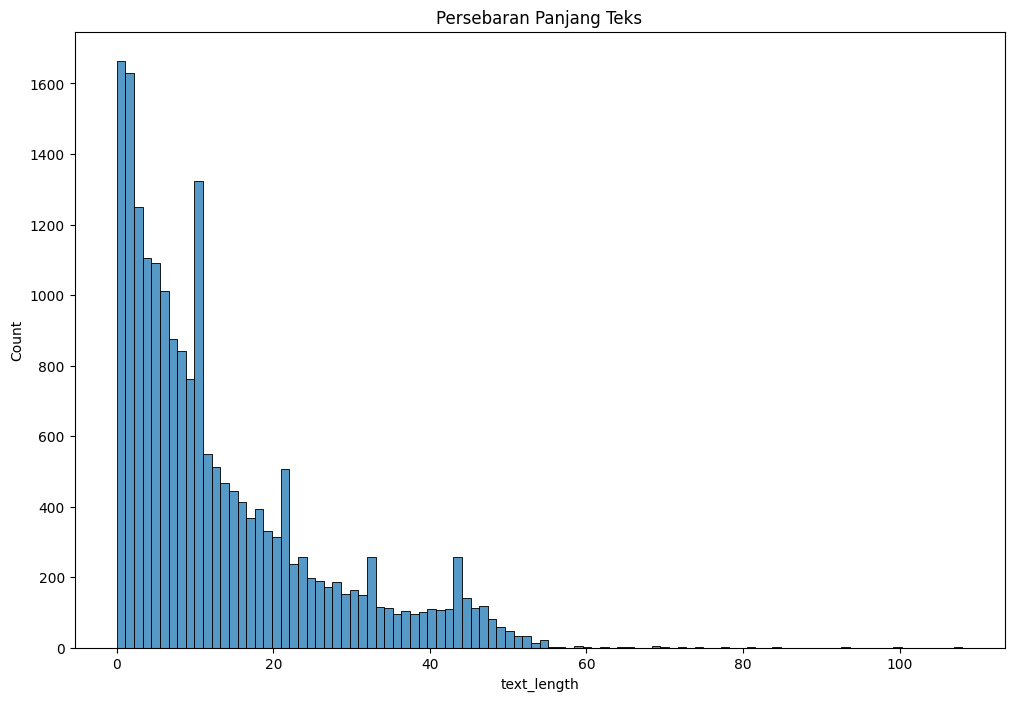

In [33]:
# Bar Chart Panjang Teks
plt.figure(figsize=(12, 8))
clean_stardew_df['text_length'] = clean_stardew_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_stardew_df['text_length'])
plt.title('Persebaran Panjang Teks')
plt.show()

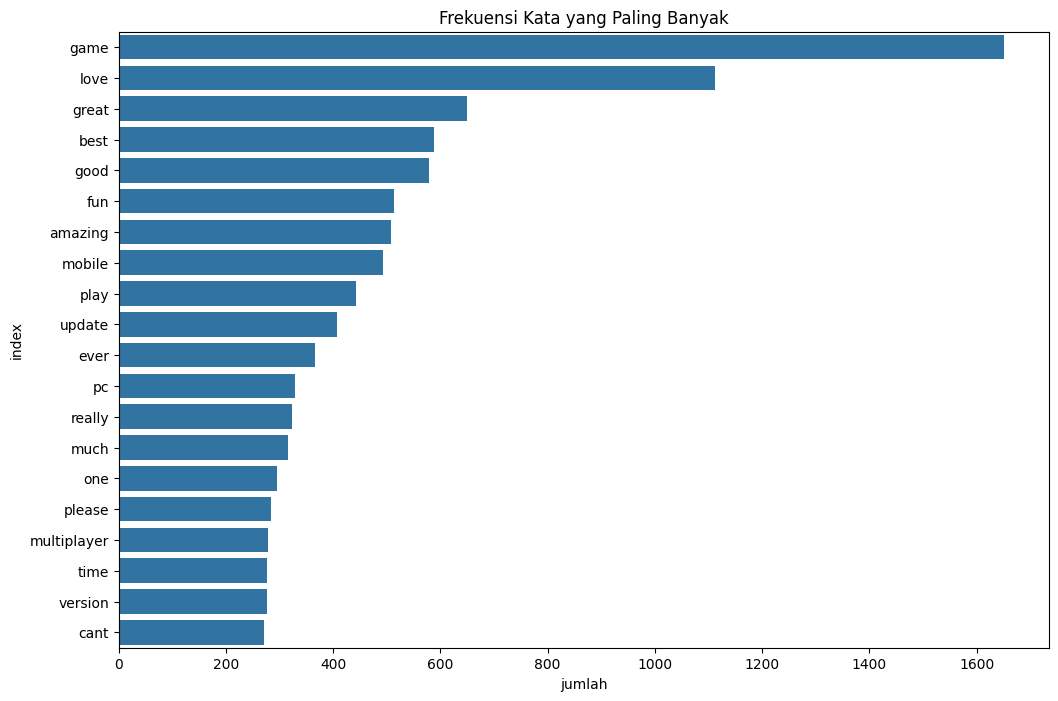

In [34]:
# Bar Chart Kata yang Sering Diucapkan
plt.figure(figsize=(12, 8))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_stardew_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Frekuensi Kata yang Paling Banyak')
plt.show()

## Train Test Split Teks

In [35]:
# Awal Cek Hasil Preprocessing Data Teks
clean_stardew_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,9f732bb9-d9af-4144-9f7a-7f5f389163a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"I love this game, I've sunken 30 hours into it and there is still so much more to do. I docked a star because the update has messed up the game. I often lag while walking, the horse stable graphic is 2 tiles above the actual horse stable building, and upon getting back on to play, my character became invisible, stuck in the grandpa shine, and all the fences I've made disappeared. Please fix this!",4,22,1.6.11.0,2024-11-06 23:45:03,NaN,NaN,1.6.11.0,I love this game Ive sunken hours into it and there is still so much more to do I docked a star because the update has messed up the game I often lag while walking the horse stable graphic is tiles above the actual horse stable building and upon getting back on to play my character became invisible stuck in the grandpa shine and all the fences Ive made disappeared Please fix this,i love this game ive sunken hours into it and there is still so much more to do i docked a star because the update has messed up the game i often lag while walking the horse stable graphic is tiles above the actual horse stable building and upon getting back on to play my character became invisible stuck in the grandpa shine and all the fences ive made disappeared please fix this,i love this game ive sunken hours into it and there is still so much more to do i docked a star because the update has messed up the game i often lag while walking the horse stable graphic is tiles above the actual horse stable building and upon getting back on to play my character became invisible stuck in the grandpa shine and all the fences ive made disappeared please fix this,"[i, love, this, game, ive, sunken, hours, into, it, and, there, is, still, so, much, more, to, do, i, docked, a, star, because, the, update, has, messed, up, the, game, i, often, lag, while, walking, the, horse, stable, graphic, is, tiles, above, the, actual, horse, stable, building, and, upon, getting, back, on, to, play, my, character, became, invisible, stuck, in, the, grandpa, shine, and, all, the, fences, ive, made, disappeared, please, fix, this]","[love, game, ive, sunken, hours, still, much, docked, star, update, messed, game, often, lag, walking, horse, stable, graphic, tiles, actual, horse, stable, building, upon, getting, back, play, character, became, invisible, stuck, grandpa, shine, fences, ive, made, disappeared, please, fix]",love game ive sunken hours still much docked star update messed game often lag walking horse stable graphic tiles actual horse stable building upon getting back play character became invisible stuck grandpa shine fences ive made disappeared please fix,6,positive,39
1,b0899b5c-3b5c-457a-a7b0-db104e83596b,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"I love this game and everything about it, but since the most recent three updates (1.6 and the bug fixes for 1.6) I have been getting kicked off. I can get on, load a save, and play for around 30 seconds, and then it kicks me off saying it stopped. My phone is fully updated, the game is fully updated, and every other app works, so it has to be the game. Edit: It also kicks me off when I try to call Clint or Pierre. I'm able to call Marnie, Gus, and Robin.",3,4,1.6.13.0,2024-11-10 23:48:51,NaN,NaN,1.6.13.0,I love this game and everything about it but since the most recent three updates and the bug fixes for I have been getting kicked off I can get on load a save and play for around seconds and then it kicks me off saying it stopped My phone is fully updated the game is fully u

In [36]:
# Memisahkan fitur dengan label
X = clean_stardew_df['text_akhir'] # Fitur
y = clean_stardew_df['polarity'] # Label

In [41]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2), min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [42]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,able,able play,absolutely,absolutely love,actually,add,add multiplayer,added,addicted,addicting,addictive,ads,ago,almost,already,also,always,amazing,amazing game,android,animals,annoying,another,anyone,anything,ape,app,around,auto,available,away,awesome,awesome game,back,bad,bar,beautiful,bed,best,best farming,best game,best games,best mobile,better,big,bit,black,bored,boring,bought,...,totally,touch,town,tried,truly,try,trying,two,update,updated,updates,use,used,using,valley,version,versions,wait,waiting,want,want play,wanted,way,well,well worth,went,whenever,whole,wish,wish could,without,wonderful,wont,work,working,works,world,worth,worth every,worth money,would,would love,would recommend,xbox,year,years,yet,youll,youre,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.226054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.162862,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.204413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170920,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.197309,0.224788,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.207519,0.0,0.0,0.000000,0.474943,0.200105,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.219826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185067,0.0,0.0,0.0,0.0,0.268699,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.150280,0.000000,0.000000,0.0,0.0,0.0,0.0,0.163385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170564,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.138503,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234115,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.112871,0.0,0.0,0.0,0.0,0.0,0.0,0.168725,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.166057,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19707,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000

In [43]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Modelling ML

Terdapat beberapa algoritma model yang dibentuk yaitu Logistic Regression, XGBOost, Decision Tree dan Random Forest.

### Algoritma Logistic Regression

In [44]:
# Menggunakan Algoritma Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Akurasi Latih dan Akurasi Uji
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.944701629779948
Logistic Regression - accuracy_test: 0.9358356581283287


### Algoritma XGBoost

In [53]:
# Menggunakan Algoritma XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
xgb_model.fit(X_train.toarray(), y_train)
y_pred_train_nb = xgb_model.predict(X_train.toarray())
y_pred_test_nb = xgb_model.predict(X_test.toarray())
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Akurasi Latih dan Akurasi Uji
print('XG Boost - accuracy_train:', accuracy_train_nb)
print('XG Boost - accuracy_test:', accuracy_test_nb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost - accuracy_train: 0.9694336990297419
XG Boost - accuracy_test: 0.942176008115648


### Algoritma Decision Tree

In [46]:
# Menggunakan Algoritma Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train.toarray(), y_train)
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Akurasi Latih dan Akurasi Uji
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9925169636628829
Decision Tree - accuracy_test: 0.898808014202384


### Algoritma Random Forest

In [47]:
# Menggunakan Algoritma Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Akurasi Latih dan Akurasi Uji
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9925169636628829
Random Forest - accuracy_test: 0.9320314481359371


In [55]:
# Menampilkan Hasil Keseluruhan Akurasi pada tiap Algoritma
results_df = pd.DataFrame({
    'Model Algoritma': ['Logistic Regression', 'XG Boost', 'Decision Tree', 'Random Forest'],
    'Akurasi Latih': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Akurasi Uji': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
accuracy_test_only = results_df[['Model Algoritma', 'Akurasi Latih', 'Akurasi Uji']]
print(accuracy_test_only)

       Model Algoritma  Akurasi Latih  Akurasi Uji
0  Logistic Regression       0.969434     0.942176
1             XG Boost       0.992517     0.932031
2        Decision Tree       0.944702     0.935836
3        Random Forest       0.992517     0.898808


In [57]:
# Memasukkan Kalimat Baru yang disimpan di dalam variabel
kalimat_baru = input("Masukkan kalimat baru: ")

# Preprocessing Kalimat Baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru menggunakan Algoritma Random Forest
prediksi_sentimen = xgb_model.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah \"Positif\".")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah \"Negatif\".")
else:
    print("Sentimen kalimat baru adalah \"Netral\".")

Masukkan kalimat baru: Game yang asik dan sangat menenangkan
Sentimen kalimat baru adalah "Netral".


## Algoritma Deep Learning LSTM

### Import Library

In [81]:
# Algoritma LSTM
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

### Labelling Kategori ke Int

In [82]:
label_encoder = LabelEncoder()
X = clean_stardew_df['text_akhir']
# Encode labels (positive -> 0, neutral -> 1, negative -> 2)
y = label_encoder.fit_transform(clean_stardew_df['polarity']) # Tanpa Transform : y = clean_stardew_df['polarity']

# Menampilkan hasil encoding
print(label_encoder.classes_)  # ['negative', 'neutral', 'positive']

# Menampilkan data yang sudah di-encode
print(y[:10])  # Menampilkan 10 data pertama yang sudah diubah menjadi integer

['negative' 'neutral' 'positive']
[2 2 2 2 0 2 0 0 2 2]


In [83]:
num_classes = len(np.unique(y))
print(f'Number of classes: {num_classes}')

Number of classes: 3


### Train Test Split Data Teks

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tokenizer Data Teks

In [85]:
tokenize = Tokenizer( oov_token='', num_words=2000)
tokenize.fit_on_texts(X_train)
word_index = tokenize.word_index

### Konversi Teks to Sequence

In [86]:
X_train_sequences = tokenize.texts_to_sequences(X_train)
X_test_sequences = tokenize.texts_to_sequences(X_test)

In [87]:
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [88]:
# Konversi label menjadi ketagori
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

### Callback Function

In [89]:
# Callback Function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callBacks = myCallback()

### Modelling using Algoritma LSTM

In [90]:
# Membuat Model
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [91]:
# Kompilasi Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
# Training Model
history = model.fit(
    X_train_padded,
    y_train_categorical,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test_categorical),
    callbacks=[callBacks]
)

Epoch 1/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 220s 435ms/step - accuracy: 0.8192 - loss: 0.4933 - val_accuracy: 0.9358 - val_loss: 0.1874
Epoch 2/10
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9595 - loss: 0.1291
Akurasi telah mencapai >90%!
493/493 ━━━━━━━━━━━━━━━━━━━━ 258s 428ms/step - accuracy: 0.9595 - loss: 0.1291 - val_accuracy: 0.9511 - val_loss: 0.1506


In [93]:
# Model Evaluate
loss, accuracy = model.evaluate(X_test_padded, y_test_categorical, verbose=2)
print(f'Akurasi Uji: {accuracy:.4f}')

124/124 - 17s - 135ms/step - accuracy: 0.9511 - loss: 0.1506
Akurasi Uji: 0.9511


### Save Model to .h5

In [94]:
# Menyimpan model
model.save('model_dl_lstm_stardew.h5')
print("Model has been Saved")

Model has been Saved


Kesimpulan

Akurasi model yang dicapai dari yang belum penggunaan Deep Learning melalui pelatihan dan uji model diantara Logistic Regression, XGBoost, Decision Tree dan Random Forest adalah model dengan algoritma XGBoost. Kemudian setelah penerapan Deep Learning dengan penggunaan LSTM Bidrectional akurasinya latih dan uji dapat stabil di 95%.